In [2]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
from Jupytils.Charts import *;
showTopbar("Markov Chain Asthma Prediction")
from WeightedMarkov.NaiveMarkov import *
from WeightedMarkov.WeightedHOMVMarkov import *


<IPython.core.display.Javascript object>

In [3]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
#patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies={'http':None, 'https':None}
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

#==========> Categorize PEF VALUES
#s= pd.qcut(df1.pefmax, 10, labels='a1,a2,a3,a4,a5,a6,a7,a8,a9,a10'.split(','))
nq = 10
lnq=list(range(0,nq))
#s= pd.qcut(df1.pefmax, nq, labels='0,1,2,3,4,5,6,7,8,9'.split(','))
s= pd.qcut(df.pef, nq, labels=lnq )
df.insert(1,"pefcat", s)
#df.pefcat = df.pefcat.astype(str)
df.pefcat = df.pefcat.astype(int)
df.insert(1,"pefcat1", 0)

df.loc[ (df.pefcat == 0) | (df.pefcat == 1) | (df.pefcat ==2), 'pefcat1'] = 0
df.loc[ (df.pefcat == 3) | (df.pefcat == 4) | (df.pefcat ==5) | (df.pefcat==6) | (df.pefcat == 7) , 'pefcat1'] = 1
df.loc[ (df.pefcat == 8) | (df.pefcat ==9) , 'pefcat1' ] = 2


#==========> Categorize precipitationpercent VALUES
s= pd.qcut(df.precipitationpercent, nq, labels=lnq )
df.insert(1,"precipcat", s)
df.precipcat = df.precipcat.astype(int)
df.insert(1,"precipzone", 0)

df.loc[ (df.precipcat == 0) | (df.precipcat == 1) | (df.precipcat ==2), 'precipzone'] = 0
df.loc[ (df.precipcat == 3) | (df.precipcat == 4) | (df.precipcat ==5), 'precipzone'] = 1
df.loc[ (df.precipcat == 6) | (df.precipcat == 7) | (df.precipcat == 8) | (df.precipcat ==9) , 'precipzone' ] = 2


#================

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)


df.pef_zone = df.pefcat1.astype(str)
#for c in df.columns:
#    if (c.find('avg') >0):
#        print (c)
dff1=df['sdttm ampm pef pef_zone precipzone so2_avg co_avg o3_avg no2_avg pm10_avg temperaturec windspeedms precipitationpercent vaporpressurehpa  airpressurehpa'.split()]
#for i,u in enumerate(dff1.pef_zone.unique()):
#    dff1.pef_zone[dff1.pef_zone == u]= i+1
    
dff1.pef_zone = dff1.pef_zone.astype(int)
df1=dff1
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
#dfAM


dfPM = df1[df1.ampm == 'pm'].copy();
allDays = pd.date_range(dfPM.sdttm.min(), dfPM.sdttm.max(), freq='D')
dfPM.index=dfPM.sdttm;
dfPM=dfPM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')

dfAMp= dfAM.copy()
#for c in dfAMp.columns:
#    if (dfAMp[c].dtype == number):
#        scaler = StandardScaler()
#        dfAMp[c] = scaler.fit_transform(dfAMp[c])
#dfAMp   
#dfAM

dfAMq= dfAM.copy()
#for c in dfAMq.columns:
#    if (dfAMq[c].dtype == number):
#        nq = len(dfAM.pef_zone.unique())
#        lnq=list(range(1,nq+1))
##        s= pd.qcut(dfAMq[c], nq, labels=lnq )
        
#        dfAMq[c] = s.astype(int)
#dfAMq
dfAMp


,sdttm,ampm,pef,pef_zone,precipzone,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,airpressurehpa
2015-01-02 06:24:00,2015-01-02 06:24:00,am,279,1,0,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,58.000,2.100,1020.500
2015-01-03 06:24:00,2015-01-02 06:24:00,am,279,1,0,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,58.000,2.100,1020.500
2015-01-04 06:24:00,2015-01-03 07:19:00,am,251,0,1,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,71.000,2.100,1022.700
2015-01-05 06:24:00,2015-01-05 06:08:00,am,273,1,2,0.006,0.997,0.005,0.048,55.841,-2.800,0.000,100.000,5.000,1016.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 06:24:00,2016-10-15 06:00:00,am,300,2,2,0.005,0.787,0.011,0.045,79.103,11.400,0.100,100.000,13.400,1022.600
2016-10-17 06:24:00,2016-10-17 06:11:00,am,292,1,2,0.003,0.587,0.012,0.028,55.090,15.000,0.800,97.000,16.500,1013.400
2016-10-18 06:24:00,2016-10-18 06:00:00,am,286,1,2,0.003,0.556,0.020,0.027,52.833,11.900,0.600,100.000,13.800,1016.100
2016-10-19 06:24:00,2016-10-18 06:00:00,am,286,1,2,0.003,0.556,0.020,0.027,52.833,11.900,0.600,100.000,13.800,1016.100


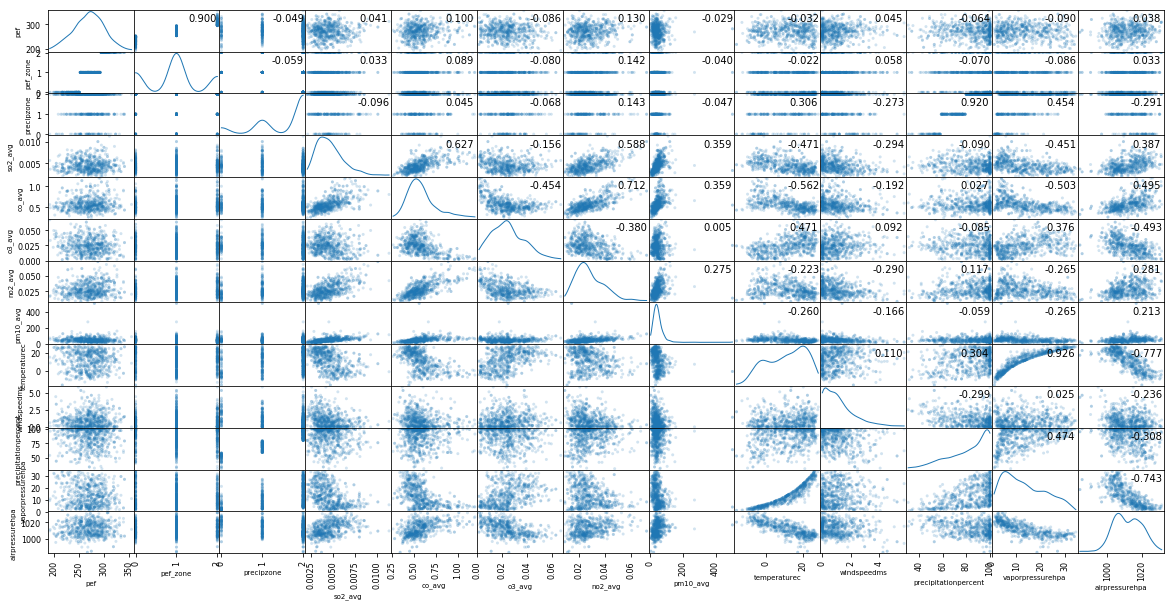

In [4]:
axes=scatter_matrix(dfAMq, alpha=0.2, diagonal='kde', figsize=(20, 10)); # diagonal can be 'hist';
corr = dfAMq.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


In [5]:
def PlotHCts1(df, x, cols=[], div=None, title='', subtitle='', yTitle='',xTitle='', num=1000000,
          onClick='function(){g=this;console.log(g.index, g.y, g.x)}',
            animation='true', ctype=None):
    TS='''
<script>
Highcharts.chart('CHART_DIV', {
    chart: { type: 'line' ,  zoomType: 'x' },
    title: { text: 'CHART_TITLE' , zoomType:'xy' },
    subtitle: { text: 'CHART_SUB_TITLE' },
    xAxis: {type: 'datetime'
    },
    yAxis: {
        title: { text: 'CHART_Y_AXIS_TITLE'}
    },
    plotOptions: {
        scatter: {
            marker: { radius: 3},
            states: {
                hover: {
                    enabled: true,
                    lineColor: 'rgb(100,100,100)'
                }
            }
        },
        line: {
            animation: CHART_ANIMATION,
            dataLabels: {  enabled: false  },
            enableMouseTracking: true,
            lineWidth: 0.1,
            marker: { radius: 3} 
            },
            
            series: {
                point: {
                    events: {
                        click: CLICK_FUNCTION
                    }
                }
            }
        },
        DATA

});
</script>
'''
    
    ts ="";
    if ( div is None ):
        div = 'chart_' + str(np.random.randint(1000000))
        ts = '<div id="{}" style="height:200px"></div>\n'.format(div)
        
    if (type(x) == str):
        xa = df[x]
    elif (type(x) == int):
        xa = df[df.columns[x]]
    else: #(type(x) == pd.core.series.Series)
        xa = x
        
    if (len(xa) <=0 ): return;
    if (xa.astype(int)[0] > 1000000000000000000):
        dt=(xa.astype(int)/1000000)[0:num]
    elif (xa.astype(int)[0] > 1000000000000000):
        dt=(xa.astype(int)/1000)[0:num]
    else:
        dt = xa;
        
    dt = [int(c) for c in dt]
    dd=[]
    
    
    for c in cols:
        if ( type(c) == str):
            d=list(df[c].values[0:num])
            cn=c
        elif( type(c) == int ):
            cn=df.columns[c]
            d=list(df[cn].values[0:num])
        else:
            cn="List"
            d=c;
            
        dat=list(zip(dt, d))
        dd.append({'name': cn, 'data': dat })

    s = 'series: ' + pd.io.json.dumps(dd) +""
    ts= ts + TS.replace('DATA',s)
    ts=ts.replace('CHART_DIV', div)
    ts=ts.replace('CHART_TITLE', title)
    ts=ts.replace('CHART_SUB_TITLE', subtitle)
    ts=ts.replace('CHART_Y_AXIS_TITLE', yTitle)
    ts=ts.replace('CLICK_FUNCTION', onClick)
    ts=ts.replace('CHART_ANIMATION', animation)

    if (ctype != None):
        ts=ts.replace("type: 'line'","type: '{}'".format(ctype));
        
    display(HTML(ts))    
    return ts;

In [6]:
ddf=dfAMq;
PlotHCts1(ddf,  ddf.index, 'temperaturec windspeedms precipitationpercent vaporpressurehpa pef_zone'.split(' '), ctype='line', title="Sample Chart for "+ patient );

## SCHAS PEF Predictions start here - Start with Naive Markov

We will use pefzone as we clasified and precipzone as aditional variable for higher order multivariate Markov Chain predictions

In [7]:
X=[dfAMp.pef_zone.values, dfAMp.precipzone.values]

In [23]:
def runNaiveMarkov(s1, order = 1, msg=None):
#    m=NaiveMarkov(' ', order)
    m=NaiveMarkov(X=[s1], nStates=6, order=order, delim=' ', n=len(s1))
    m.fit(s1)
    start = tuple([s1[i] for i in range(order)])
    #r = m.Predict(start )
    #NaiveMarkov.Score(s1, r, True, msg="For MC order = {}".format(order))
    r = m.PredictFromList(s1 )
    m.Score(s1, r, msg=msg);

for order in range(1,10,2):
    runNaiveMarkov(X[0], order, "For MC: with seeds taken from original fit tuples Order: {}".format(order))

=======================Metrics :  For MC: with seeds taken from original fit tuples Order: 1
orig=>[1 1 0 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0]
pred=>[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Total 657, correct 295, acc: 0.45
class:0 total:174, correct:61, accuracy:0.3505747126436782
class:1 total:341, correct:194, accuracy:0.5689149560117303
class:2 total:142, correct:40, accuracy:0.28169014084507044
=======================Metrics :  For MC: with seeds taken from original fit tuples Order: 3
orig=>[1 1 0 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0]
pred=>[1, 1, 0, 0,

## SCHAS PEF Predictions start here - Now with Weighted Higher Order Multi Variate Markov 


In [24]:
def runHOMVMarkov(X, nStates=3, order=2, msg=None):
    s=len(X)  # => Number of series

    hm = WeightedHOMVMarkov(X, nStates, order)
    f, p, x = hm.fit();
    #h.Dump()
    c,A,b = hm.PrepareMatrices()
    #hm.DisplayCAb(0)
    #hm.DisplayCAb(1)
    #print ("c=", c, "\nA=\n", A, "\nb=", b)
    sol = hm.Solve(False)
    hm.DumpSolution();

    ac=hm.SelfEval();
    
for order in range(2,12,4):
    runHOMVMarkov(X, 3, order, "For MC: with seeds taken from original fit tuples Order: {}".format(order))
    #break;

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0 [ 0.19  0.62  0.18] 1 1
1 [ 0.11  0.23  0.66] 2 2
=======================Metrics :  None
orig=>[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
pred=>[0 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0 2 2]
Total 655, correct 374, acc: 0.57
class:0 total:174, correct:97, accuracy:0.5574712643678161
class:1 total:481, correct:277, accuracy:0.5758835758835759
=======================Metrics :  None
orig=>[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred=>[1 2 2 0 0 2 2 2 2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 0 1 1 0 0 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 1 1 2 2 2 0 2 1 1 0 1 2 2 2 1 1 1 0 2 2 2 1 1 1 1 2 2 1 0 0]
Total 655, correct 437, acc: 0.67
class:2 tot

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0 [ 0.19  0.62  0.18] 1 1
1 [ 0.11  0.23  0.66] 2 2
=======================Metrics :  None
orig=>[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0]
pred=>[1 1 1 1 0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0 2 2 1 2 0 1]
Total 651, correct 372, acc: 0.57
class:0 total:173, correct:97, accuracy:0.5606936416184971
class:1 total:478, correct:275, accuracy:0.5753138075313807
=======================Metrics :  None
orig=>[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred=>[0 2 2 2 2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 0 1 1 0 0 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 1 1 2 2 2 0 2 1 1 0 1 2 2 2 1 1 1 0 2 2 2 1 1 1 1 2 2 1 0 0 1 2 2 2]
Total 651, correct 435, acc: 0.67
class:2 tot

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0 [ 0.19  0.62  0.18] 1 2
1 [ 0.11  0.23  0.66] 2 2
=======================Metrics :  None
orig=>[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
pred=>[0 2 1 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 0 2 2 1 2 0 1 1 2 2 2]
Total 647, correct 368, acc: 0.57
class:0 total:173, correct:97, accuracy:0.5606936416184971
class:1 total:474, correct:271, accuracy:0.5717299578059072
=======================Metrics :  None
orig=>[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred=>[2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 0 1 1 0 0 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 1 1 2 2 2 0 2 1 1 0 1 2 2 2 1 1 1 0 2 2 2 1 1 1 1 2 2 1 0 0 1 2 2 2 2 2 2 2]
Total 647, correct 432, acc: 0.67
class:2 tot